<a href="https://colab.research.google.com/github/sergiimakhin/Project_DA/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Set: KiGGS longtitudinal study of childens health in Germany
The KiGGS is a long-term study conducted y the Robert Koch institute to monitor the health of children, adolescents and young adults in Germany.

Investigate blood levels of HbA1c which is a blood biomarker of blood sugar levels and therefore an indicator of diabetes
Variables that might be associated are bmiB (body mass index), sex, age2 (sex) and the amount and frequency of eating chips (fq44/ fq44a)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


In [ ]:
# installing library googletrans
!pip install googletrans==4.0.0-rc1

In [21]:
from googletrans import Translator

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ReDI-School/nrw-data-analytics/main/9_KiGGS03_06.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HbA1c   14097 non-null  float64
 1   bmiB    17493 non-null  float64
 2   sex     17640 non-null  object 
 3   age2    17640 non-null  object 
 4   fq44    15767 non-null  object 
 5   fq44a   15724 non-null  object 
dtypes: float64(2), object(4)
memory usage: 827.0+ KB


In [5]:
df.head(3)

,HbA1c,bmiB,sex,age2,fq44,fq44a
0,4.2,21.929268,Männlich,12 - 13 J.,1 mal im Monat,1/4 Schale (oder weniger)
1,5.4,16.546827,Männlich,10 - 11 J.,2-3 mal im Monat,2 Schalen
2,4.4,22.564967,Weiblich,8 - 9 J.,2-3 mal im Monat,1 Schale


In [6]:
# changing column names
df.columns = ['bl_sugar', 'BMI', 'gender', 'age_group', 'freq_chips', 'bowls_chips']

In [7]:
df.columns

Index(['bl_sugar', 'BMI', 'gender', 'age_group', 'freq_chips', 'bowls_chips'], dtype='object')

In [8]:
# caclulating the percentage of Null values in each column
((df.isna().sum() / len(df)) * 100).round(2)

bl_sugar       20.09
BMI             0.83
gender          0.00
age_group       0.00
freq_chips     10.62
bowls_chips    10.86
dtype: float64

In [9]:
# rounding the body mass index value to 2 decimals
df.BMI = df.BMI.round(2)

In [10]:
# defining a new function to change gender signifiers
def gender_eng(x):
  if x == 'Weiblich': return 'W'
  else: return 'M'

df.gender = df.gender.apply(gender_eng)

In [11]:
df.head(3)

,bl_sugar,BMI,gender,age_group,freq_chips,bowls_chips
0,4.2,21.93,M,12 - 13 J.,1 mal im Monat,1/4 Schale (oder weniger)
1,5.4,16.55,M,10 - 11 J.,2-3 mal im Monat,2 Schalen
2,4.4,22.56,W,8 - 9 J.,2-3 mal im Monat,1 Schale


In [12]:
# replacing 'J.' with an English equivalent 'y.o.'
df['age_group'] = df['age_group'].str.replace('J.', 'y.o.')

In [13]:
# creating a list of age groups
age_groups = list(df['age_group'].unique())
age_groups

['12 - 13 y.o.',
 '10 - 11 y.o.',
 '8 - 9 y.o.',
 '14 - 15 y.o.',
 '4 - 5 y.o.',
 '0 - 1 y.o.',
 '2 - 3 y.o.',
 '6 - 7 y.o.',
 '16 - 17 y.o.']

In [14]:
# creating a ranked list of age groups
age_groups_ranked = sorted(age_groups)
age_groups_ranked

['0 - 1 y.o.',
 '10 - 11 y.o.',
 '12 - 13 y.o.',
 '14 - 15 y.o.',
 '16 - 17 y.o.',
 '2 - 3 y.o.',
 '4 - 5 y.o.',
 '6 - 7 y.o.',
 '8 - 9 y.o.']

In [15]:
#moving down the four elements of the list which are out of order
age_groups_to_move_down = age_groups_ranked[1:5]
del age_groups_ranked[1:5]
age_groups_ranked.extend(age_groups_to_move_down)
age_groups_ranked

['0 - 1 y.o.',
 '2 - 3 y.o.',
 '4 - 5 y.o.',
 '6 - 7 y.o.',
 '8 - 9 y.o.',
 '10 - 11 y.o.',
 '12 - 13 y.o.',
 '14 - 15 y.o.',
 '16 - 17 y.o.']

In [16]:
# converting 'age_group' to a categorical type with an order
df['age_group'] = pd.Categorical(df['age_group'], categories=age_groups_ranked, ordered=True)

In [17]:
df['age_group'].dtype

CategoricalDtype(categories=['0 - 1 y.o.', '2 - 3 y.o.', '4 - 5 y.o.', '6 - 7 y.o.',
                  '8 - 9 y.o.', '10 - 11 y.o.', '12 - 13 y.o.', '14 - 15 y.o.',
                  '16 - 17 y.o.'],
, ordered=True)

In [18]:
# creating additional column 'age_group_rank' via converting the categorical values of 'age_group' to integer codes
df['age_group_rank'] = df['age_group'].cat.codes
df.head(3)

,bl_sugar,BMI,gender,age_group,freq_chips,bowls_chips,age_group_rank
0,4.2,21.93,M,12 - 13 y.o.,1 mal im Monat,1/4 Schale (oder weniger),6
1,5.4,16.55,M,10 - 11 y.o.,2-3 mal im Monat,2 Schalen,5
2,4.4,22.56,W,8 - 9 y.o.,2-3 mal im Monat,1 Schale,4


In [19]:
# checking unique values in column 'freq_chips'
df['freq_chips'].unique()

array(['1 mal im Monat', '2-3 mal im Monat', '1-2 mal pro Woche', nan,
       'Nie', '3-4 mal pro Woche', '1 mal am Tag', '5-6 mal pro Woche',
       '2-3 mal am Tag', '4-5 mal am Tag', 'Öfter als 5 mal am Tag'],
      dtype=object)

In [22]:
# initializing the translator
translator = Translator()

# defining a new function to translate German strings to English
def de_en_translate(x):

  if not x: return x

  try:
    translated = translator.translate(x, src='de', dest='en')
    return translated.text
  except:
    return x

In [24]:
# creating a list of unique values in column 'freq_chips'
freq_chips_unique_values = list(df['freq_chips'].unique())
freq_chips_unique_values

['1 mal im Monat',
 '2-3 mal im Monat',
 '1-2 mal pro Woche',
 nan,
 'Nie',
 '3-4 mal pro Woche',
 '1 mal am Tag',
 '5-6 mal pro Woche',
 '2-3 mal am Tag',
 '4-5 mal am Tag',
 'Öfter als 5 mal am Tag']

In [25]:
# creating a mapping dictionary to associate German and English language strings
freq_chips_map = {}

for i in freq_chips_unique_values:
  freq_chips_map[i] = de_en_translate(i)

freq_chips_map

{'1 mal im Monat': '1 time a month',
 '2-3 mal im Monat': '2-3 times a month',
 '1-2 mal pro Woche': '1-2 times a week',
 nan: 'Nan',
 'Nie': 'Never',
 '3-4 mal pro Woche': '3-4 times a week',
 '1 mal am Tag': '1 time a day',
 '5-6 mal pro Woche': '5-6 times a week',
 '2-3 mal am Tag': '2-3 times a day',
 '4-5 mal am Tag': '4-5 times a day',
 'Öfter als 5 mal am Tag': 'More than 5 times a day'}

In [26]:
# mapping the created dictionary on each element of column 'freq_chips'
df['freq_chips'] = df['freq_chips'].map(freq_chips_map)
df['freq_chips'].unique()

array(['1 time a month', '2-3 times a month', '1-2 times a week', 'Nan',
       'Never', '3-4 times a week', '1 time a day', '5-6 times a week',
       '2-3 times a day', '4-5 times a day', 'More than 5 times a day'],
      dtype=object)

In [27]:
df.head(3)

,bl_sugar,BMI,gender,age_group,freq_chips,bowls_chips,age_group_rank
0,4.2,21.93,M,12 - 13 y.o.,1 time a month,1/4 Schale (oder weniger),6
1,5.4,16.55,M,10 - 11 y.o.,2-3 times a month,2 Schalen,5
2,4.4,22.56,W,8 - 9 y.o.,2-3 times a month,1 Schale,4


In [28]:
df['freq_chips'].value_counts()

freq_chips
2-3 times a month          5199
1-2 times a week           3737
1 time a month             3408
Nan                        1873
Never                      1683
3-4 times a week           1080
1 time a day                311
5-6 times a week            261
2-3 times a day              73
4-5 times a day               9
More than 5 times a day       6
Name: count, dtype: int64

In [29]:
# checking whether "Nan" is a Null value
df['freq_chips'].isna().sum()

0

In [30]:
# since it is not, replacing 'Nan' with np.nan
df['freq_chips'] = df['freq_chips'].replace('Nan', np.nan)

In [31]:
# checking if it's done according to the plan
df['freq_chips'].isna().sum()

1873

In [32]:
# checking the unique values of column 'bowl_chips'
df['bowls_chips'].unique()

array(['1/4 Schale (oder weniger)', '2 Schalen', '1 Schale', nan,
       '1/2 Schale', '3 Schalen (oder mehr)', 'nie'], dtype=object)

In [33]:
# counting the Null values in column 'bowl_chips'
df['bowls_chips'].isna().sum()

1916

In [34]:
# creating a list of unique values
bowl_chips_unique_values = list(df['bowls_chips'].unique())
bowl_chips_unique_values

['1/4 Schale (oder weniger)',
 '2 Schalen',
 '1 Schale',
 nan,
 '1/2 Schale',
 '3 Schalen (oder mehr)',
 'nie']

In [35]:
# creating a mapping dictionary with correspoding German-English translations
bowl_chips_map = {}

for i in bowl_chips_unique_values:
  bowl_chips_map[i] = de_en_translate(i)

bowl_chips_map

{'1/4 Schale (oder weniger)': '1/4 shell (or less)',
 '2 Schalen': '2 shells',
 '1 Schale': '1 bowl',
 nan: 'Nan',
 '1/2 Schale': '1/2 shell',
 '3 Schalen (oder mehr)': '3 shells (or more)',
 'nie': 'never'}

In [36]:
# as the word 'Schale(n)' was a few times translated incorrectly as 'shell(s)', making the needed changes in the dictionary
for key, value in bowl_chips_map.items():
    if 'shells' in value:
        value = value.replace('shells', 'bowls')
    if 'shell' in value:
        value = value.replace('shell', 'bowl')
    bowl_chips_map[key] = value

bowl_chips_map

{'1/4 Schale (oder weniger)': '1/4 bowl (or less)',
 '2 Schalen': '2 bowls',
 '1 Schale': '1 bowl',
 nan: 'Nan',
 '1/2 Schale': '1/2 bowl',
 '3 Schalen (oder mehr)': '3 bowls (or more)',
 'nie': 'never'}

In [37]:
# mapping the dictionary on the column
df['bowls_chips'] = df['bowls_chips'].map(bowl_chips_map)
df['bowls_chips'].unique()

array(['1/4 bowl (or less)', '2 bowls', '1 bowl', 'Nan', '1/2 bowl',
       '3 bowls (or more)', 'never'], dtype=object)

In [38]:
# counting Null values
df['bowls_chips'].isna().sum()

0

In [39]:
# replacing 'Nan' with np.nan
df['bowls_chips'] = df['bowls_chips'].replace('Nan', np.nan)

In [40]:
df['bowls_chips'].isna().sum()

1916

In [41]:
# since the Null values are located in critical for data analysis columns,
# it seems reasonable to drop each row where even a single value is Null

In [42]:
df_cleaned = df.dropna(how = 'any').reset_index(drop = True)
df_cleaned.shape

(13276, 7)

In [43]:
df_cleaned.isna().sum()

bl_sugar          0
BMI               0
gender            0
age_group         0
freq_chips        0
bowls_chips       0
age_group_rank    0
dtype: int64

In [44]:
df_cleaned.head(3)

,bl_sugar,BMI,gender,age_group,freq_chips,bowls_chips,age_group_rank
0,4.2,21.93,M,12 - 13 y.o.,1 time a month,1/4 bowl (or less),6
1,5.4,16.55,M,10 - 11 y.o.,2-3 times a month,2 bowls,5
2,4.4,22.56,W,8 - 9 y.o.,2-3 times a month,1 bowl,4


In [45]:
df_cleaned.freq_chips.unique()

array(['1 time a month', '2-3 times a month', '1-2 times a week', 'Never',
       '3-4 times a week', '1 time a day', '5-6 times a week',
       '2-3 times a day', '4-5 times a day', 'More than 5 times a day'],
      dtype=object)

In [46]:
# creating an ordered list of unique values for column 'freq_chips'
freq_chips_ranked = ['Never', '1 time a month', '2-3 times a month', '1-2 times a week', '3-4 times a week', '5-6 times a week', '1 time a day', '2-3 times a day', '4-5 times a day', 'More than 5 times a day']

In [47]:
# converting 'freq_chips' to a categorical type with an order

df_cleaned['freq_chips'] = pd.Categorical(df_cleaned['freq_chips'], categories=freq_chips_ranked, ordered=True)
df_cleaned['freq_chips'].dtype

CategoricalDtype(categories=['Never', '1 time a month', '2-3 times a month',
                  '1-2 times a week', '3-4 times a week', '5-6 times a week',
                  '1 time a day', '2-3 times a day', '4-5 times a day',
                  'More than 5 times a day'],
, ordered=True)

In [48]:
# creating additional column 'freq_chips_rank' via converting the categorical values of 'freq_chips' to integer codes
df_cleaned['freq_chips_rank'] = df_cleaned['freq_chips'].cat.codes

In [49]:
df_cleaned.bowls_chips.unique()

array(['1/4 bowl (or less)', '2 bowls', '1 bowl', '1/2 bowl',
       '3 bowls (or more)', 'never'], dtype=object)

In [50]:
# creating an ordered list of unique values for column 'bowls_chips'
bowls_chips_ranked = ['never', '1/4 bowl (or less)', '1/2 bowl', '1 bowl', '2 bowls', '3 bowls (or more)']

In [51]:
# converting 'bowls_chips' to a categorical type with an order
df_cleaned['bowls_chips'] = pd.Categorical(df_cleaned['bowls_chips'], categories=bowls_chips_ranked, ordered=True)
df_cleaned['bowls_chips'].dtype

CategoricalDtype(categories=['never', '1/4 bowl (or less)', '1/2 bowl', '1 bowl',
                  '2 bowls', '3 bowls (or more)'],
, ordered=True)

In [52]:
# creating additional column 'bowls_chips_rank' via converting the categorical values of 'bowls_chips' to integer codes
df_cleaned['bowls_chips_rank'] = df_cleaned['bowls_chips'].cat.codes

In [53]:
df_cleaned.head(3)

,bl_sugar,BMI,gender,age_group,freq_chips,bowls_chips,age_group_rank,freq_chips_rank,bowls_chips_rank
0,4.2,21.93,M,12 - 13 y.o.,1 time a month,1/4 bowl (or less),6,1,1
1,5.4,16.55,M,10 - 11 y.o.,2-3 times a month,2 bowls,5,2,4
2,4.4,22.56,W,8 - 9 y.o.,2-3 times a month,1 bowl,4,2,3


# **Analyzing the data**

In [54]:
df_cleaned.describe(include='all').fillna('')

,bl_sugar,BMI,gender,age_group,freq_chips,bowls_chips,age_group_rank,freq_chips_rank,bowls_chips_rank
count,13276.0,13276.0,13276,13276,13276,13276,13276.0,13276.0,13276.0
unique,,,2,9,10,6,,,
top,,,M,8 - 9 y.o.,2-3 times a month,1 bowl,,,
freq,,,6798,1797,4475,4575,,,
mean,4.859393,18.499034,,,,,4.546023,2.112157,2.193507
std,0.42678,3.814109,,,,,2.291931,1.30241,1.188453
min,1.5,11.59,,,,,0.0,0.0,0.0
25%,4.6,15.7,,,,,3.0,1.0,1.0
50%,4.9,17.52,,,,,5.0,2.0,2.0
75%,5.1,20.4125,,,,,6.0,3.0,3.0


In [55]:
# making a scatterplot to show the association between two continuous variables: blood sugar level and body mass index
px.scatter(df_cleaned, x = 'BMI', y = 'bl_sugar')

In [56]:
# calculating Pearson's correlation
correlation, p_value = pearsonr(df_cleaned['BMI'], df_cleaned['bl_sugar'])

print("Pearson correlation:", correlation.round(4))
print("P-value:", p_value.round(4))

Pearson correlation: 0.0249
P-value: 0.0041


### **The positive correlation is statistically significant but still very weak**

<Axes: xlabel='gender', ylabel='bl_sugar'>

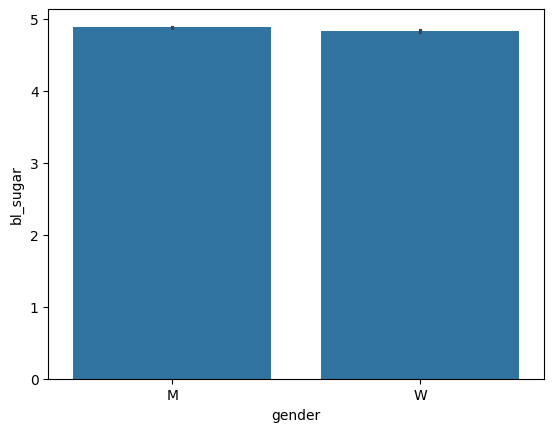

In [57]:
# checking the difference in blood sugar level between boys and girls
sns.barplot(x = 'gender', y = 'bl_sugar', data = df_cleaned)

In [58]:
# calculating t-test
bl_sugar_men = df_cleaned[df_cleaned['gender'] == 'M']['bl_sugar']
bl_sugar_women = df_cleaned[df_cleaned['gender'] == 'W']['bl_sugar']
t_stat, p_value = ttest_ind(bl_sugar_men, bl_sugar_women)

print(f"T-statistic: {t_stat.round(4)}")
print(f"P-value: {p_value}")

T-statistic: 6.313
P-value: 2.823530458835996e-10


In [59]:
bl_sugar_women.mean().round(3)

4.835

In [60]:
bl_sugar_men.mean().round(3)

4.882

### **The difference is statistically significant but discernable only on big data**

<Axes: xlabel='age_group', ylabel='bl_sugar'>

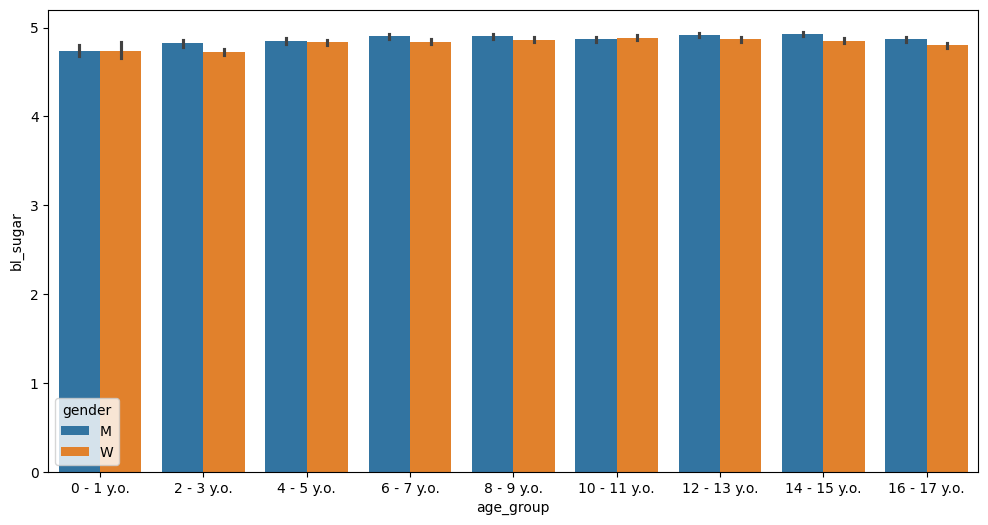

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'age_group', y = 'bl_sugar', hue = 'gender', data = df_cleaned)

In [62]:
# Calculate Spearman rank correlation
correlation, p_value = spearmanr(df_cleaned['bl_sugar'], df_cleaned['age_group_rank'])

print("Spearman correlation:", correlation.round(4))
print("P-value:", p_value)

Spearman correlation: 0.0485
P-value: 2.3273242653720458e-08


### **The positive correlation is statistically significant but very weak**




<Axes: xlabel='freq_chips', ylabel='bl_sugar'>

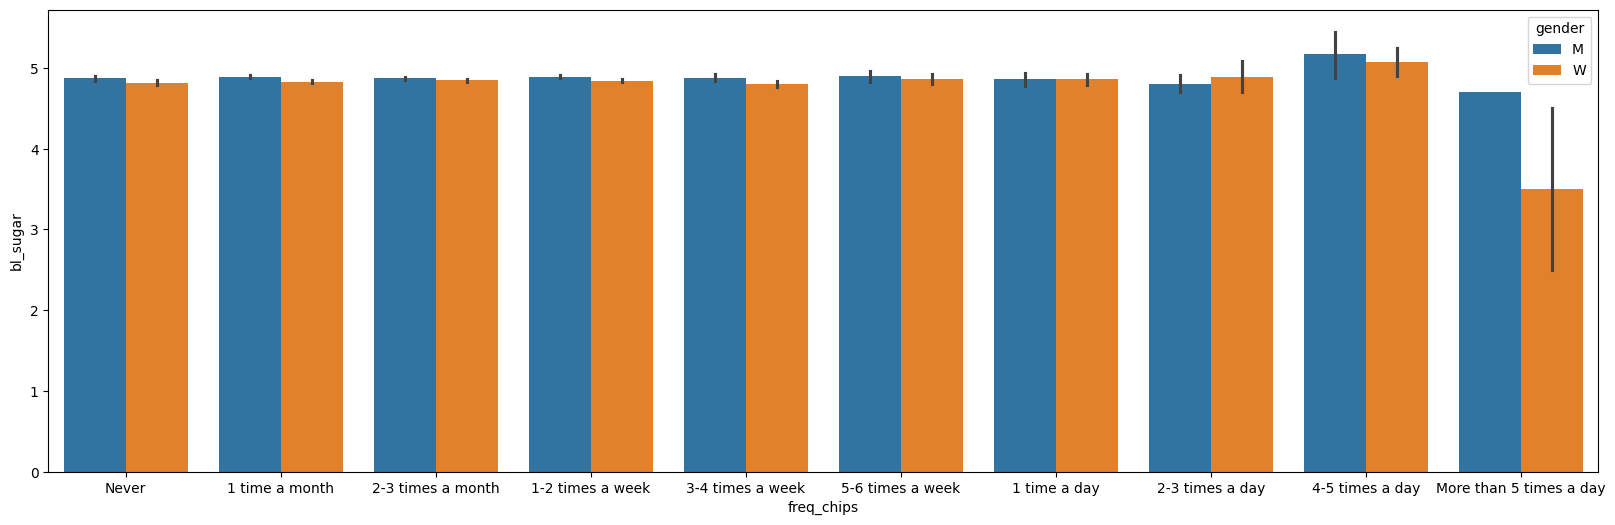

In [63]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'freq_chips', y = 'bl_sugar', hue = 'gender', data = df_cleaned)

In [64]:
# Calculate Spearman rank correlation
correlation, p_value = spearmanr(df_cleaned['bl_sugar'], df_cleaned['freq_chips_rank'])

print("Spearman correlation:", correlation.round(4))
print("P-value:", p_value)

Spearman correlation: 0.0088
P-value: 0.30900509566692935


**The correlation is statistically insignificant but it can observed a visible increase in blood sugar between children who eat chips 2-3 times a day and those who eat cheaps 4-5 times a day. There is also a paradoxical decrease in blood sugar for children who eat chips most often. Yet the standard deviation for this sample is very high which can undermine the validity of statistical comparison between adjacent groups**




In [65]:
freq_chips_2_3_a_day = df_cleaned['bl_sugar'][df_cleaned['freq_chips'] == '2-3 times a day']
freq_chips_4_5_a_day = df_cleaned['bl_sugar'][df_cleaned['freq_chips'] == '4-5 times a day']

In [66]:
t_stat, p_value = ttest_ind(freq_chips_2_3_a_day, freq_chips_4_5_a_day)

print(f"T-statistic: {t_stat.round(4)}")
print(f"P-value: {p_value}")

T-statistic: -1.909
P-value: 0.060676144054449335


### **The p-level of 0.06 is out of acceptable range (>0.05), hence the visible on the barplot difference can not be statistically corroborated**

<Axes: xlabel='bowls_chips', ylabel='bl_sugar'>

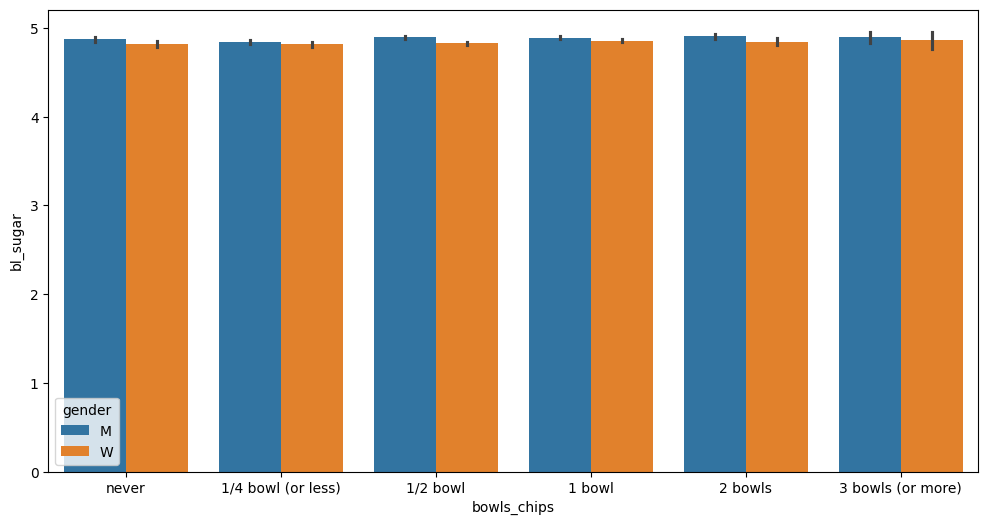

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'bowls_chips', y = 'bl_sugar', hue = 'gender', data = df_cleaned)

In [68]:
# Calculate Spearman rank correlation
correlation, p_value = spearmanr(df_cleaned['bl_sugar'], df_cleaned['bowls_chips_rank'])

print("Spearman correlation:", correlation.round(4))
print("P-value:", p_value)

Spearman correlation: 0.0413
P-value: 1.930927443282724e-06


### **There is a statistically sifnificant positive correlation between blood sugar index and the number of regularly consumed chips bowls. Still it is again very weak and can be seen only on big samples**

<Axes: xlabel='freq_chips', ylabel='bl_sugar'>

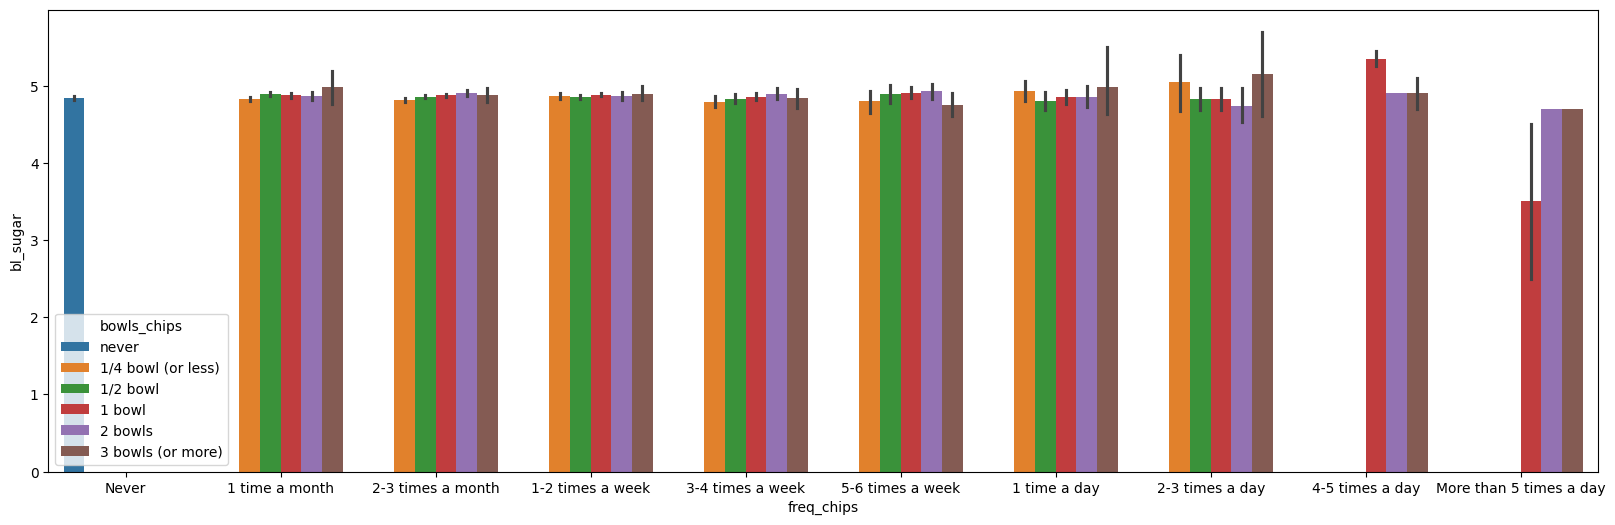

In [69]:
# checking the association between blood sugar index and a combination of variables representing the frequency and the amount of consumed chips
plt.figure(figsize=(20, 6))
sns.barplot(x = 'freq_chips', y = 'bl_sugar', hue = 'bowls_chips', data = df_cleaned)


<Axes: xlabel='freq_chips', ylabel='Mean Blood Sugar'>

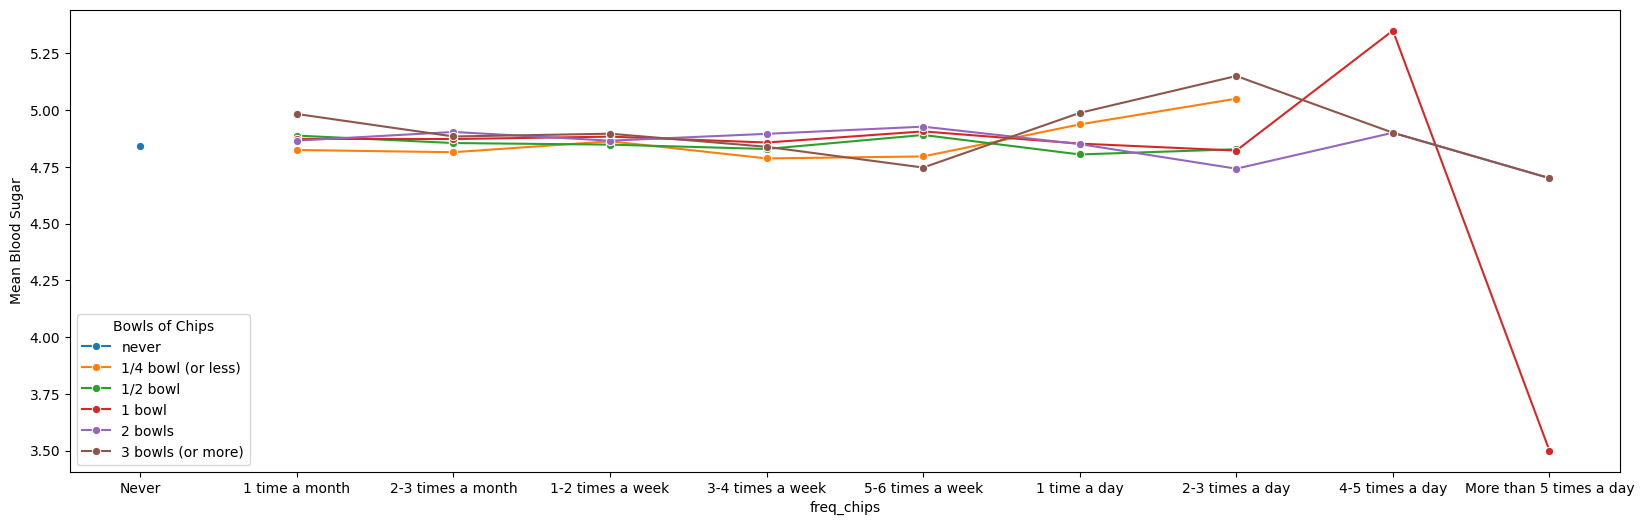

In [70]:
# calculating the mean blood sugar for each combination of freq_chips and bowls_chips
mean_blood_sugar = df_cleaned.groupby(['freq_chips', 'bowls_chips'])['bl_sugar'].mean().unstack()

# reseting index and converting the DataFrame into a long-form DataFrame
mean_blood_sugar = mean_blood_sugar.reset_index().melt(id_vars='freq_chips', value_name='Mean Blood Sugar', var_name='Bowls of Chips')

# creating a line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=mean_blood_sugar, x='freq_chips', y='Mean Blood Sugar', hue='Bowls of Chips', marker='o')
